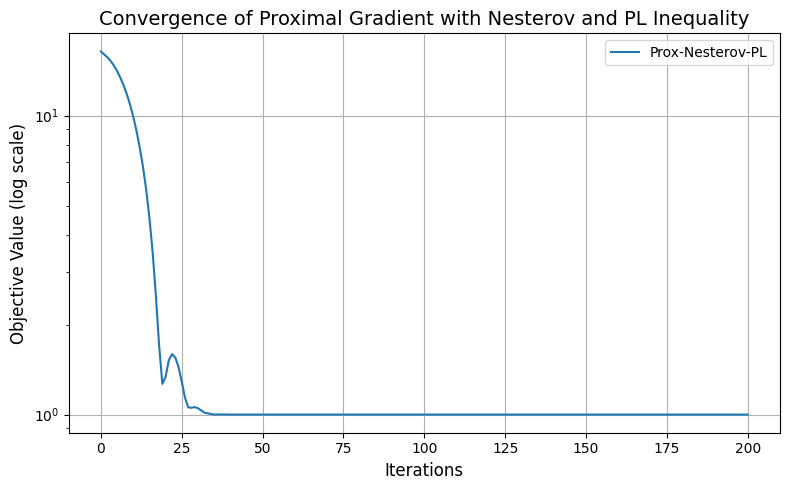

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ======= USER-DEFINED FUNCTIONS =========

# Weakly smooth function: f(x) = sqrt(1 + ||x||^2)
def f(x):
    return np.sqrt(1 + np.sum(x**2))

# Gradient of f(x)
def grad_f(x):
    norm_sq = np.sum(x**2)
    return x / np.sqrt(1 + norm_sq)

# Convex non-smooth part: g(x) = lambda * ||x||_1
lambda_reg = 0.1
def g(x):
    return lambda_reg * np.linalg.norm(x, 1)

# Total objective
def F(x):
    return f(x) + g(x)

# Proximal operator for l1 norm: Soft thresholding
def prox_l1(v, thresh):
    return np.sign(v) * np.maximum(np.abs(v) - thresh, 0)

# ======= OPTIMIZER IMPLEMENTATION =========

def prox_grad_nesterov_pl(x0, eta=0.1, beta_fn=None, num_iters=200):
    x = x0.copy()
    y = x0.copy()
    history = [F(x)]

    for t in range(1, num_iters + 1):
        grad = grad_f(y)
        x_next = prox_l1(y - eta * grad, eta * lambda_reg)

        # Momentum parameter (can be changed)
        beta = beta_fn(t) if beta_fn else (t - 1) / (t + 2)
        y = x_next + beta * (x_next - x)

        x = x_next
        history.append(F(x))

    return x, history

# ======= RUN EXPERIMENT =========

np.random.seed(42)
d = 100  # Dimensionality
x0 = np.random.randn(d)

# Example: Nesterov beta schedule
beta_schedule = lambda t: (t - 1) / (t + 2)

# Run the optimizer
solution, objective_history = prox_grad_nesterov_pl(x0, eta=0.1, beta_fn=beta_schedule, num_iters=200)

# ======= PLOT CONVERGENCE =========

plt.figure(figsize=(8, 5))
plt.plot(objective_history, label='Prox-Nesterov-PL')
plt.yscale("log")
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Objective Value (log scale)", fontsize=12)
plt.title("Convergence of Proximal Gradient with Nesterov and PL Inequality", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


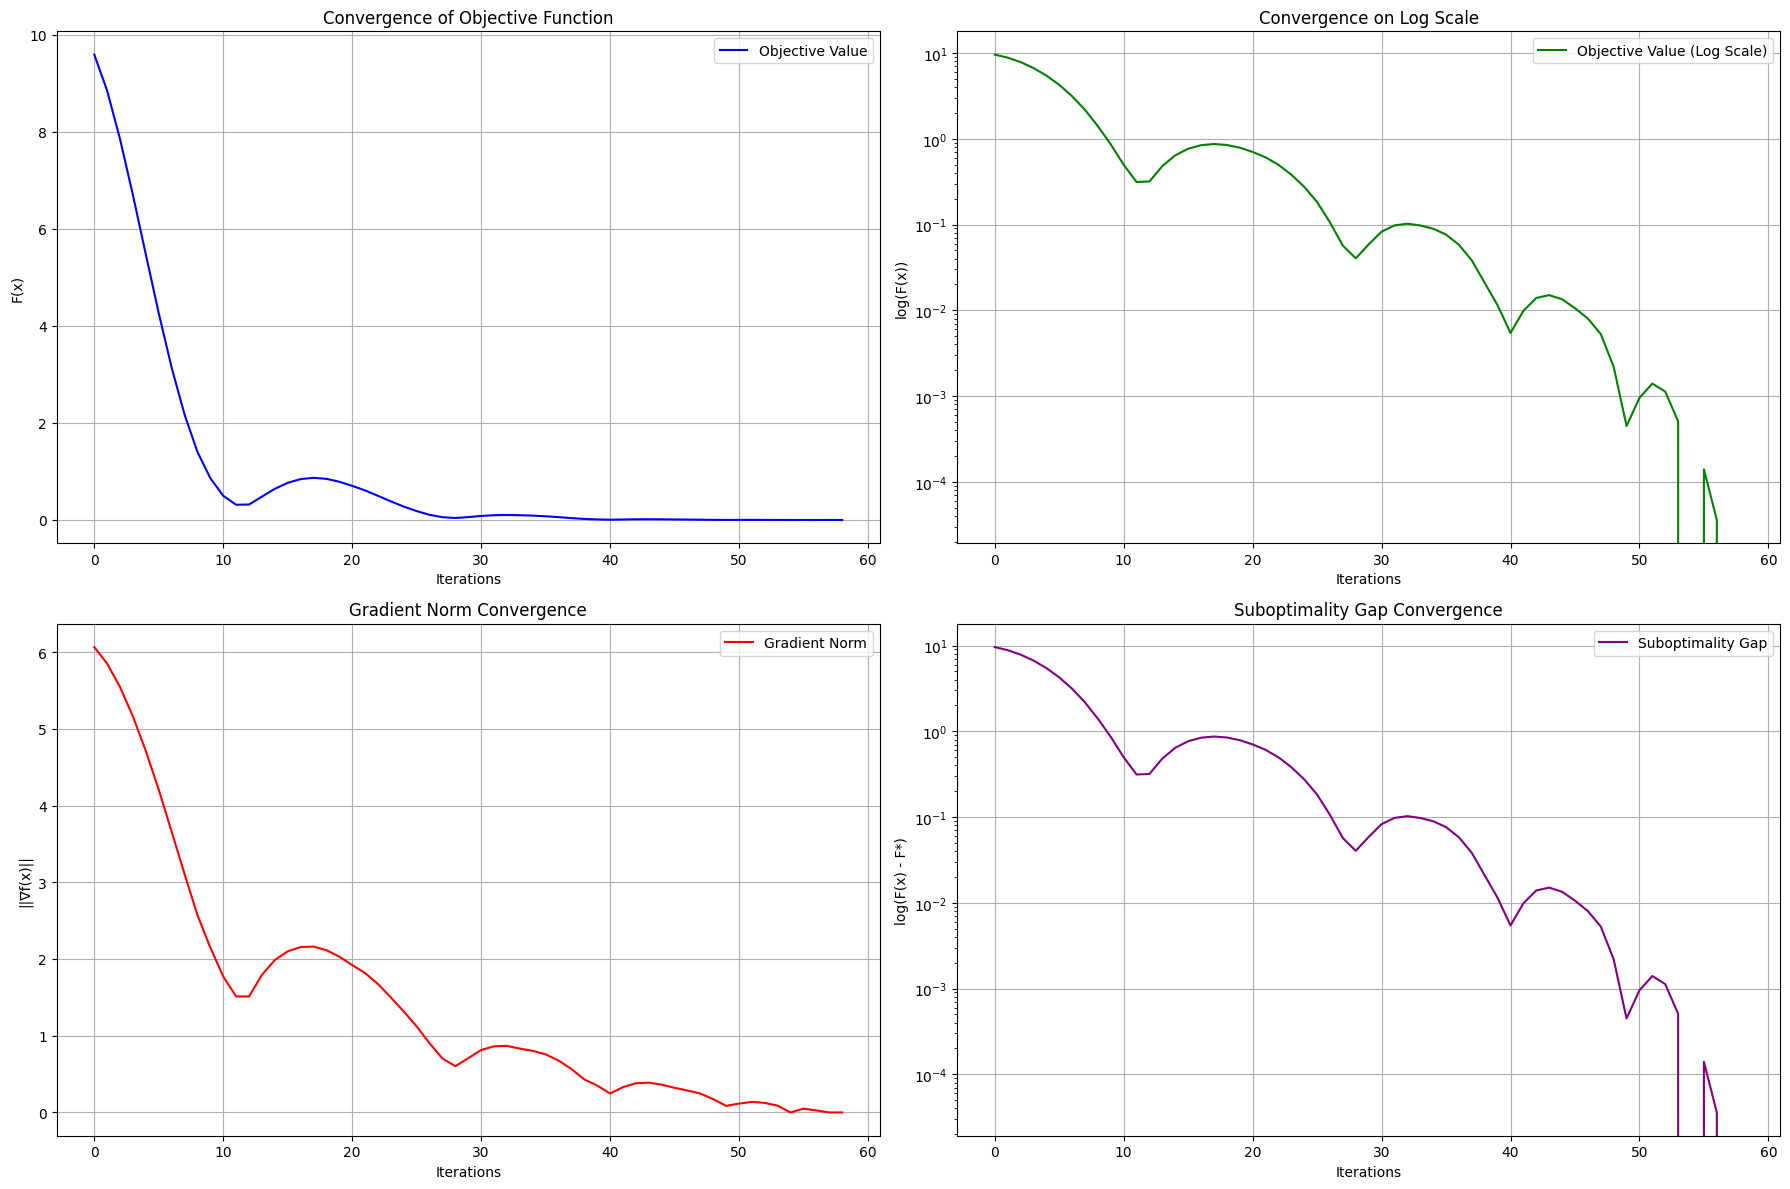

Optimal x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Final Objective Value: 0.0


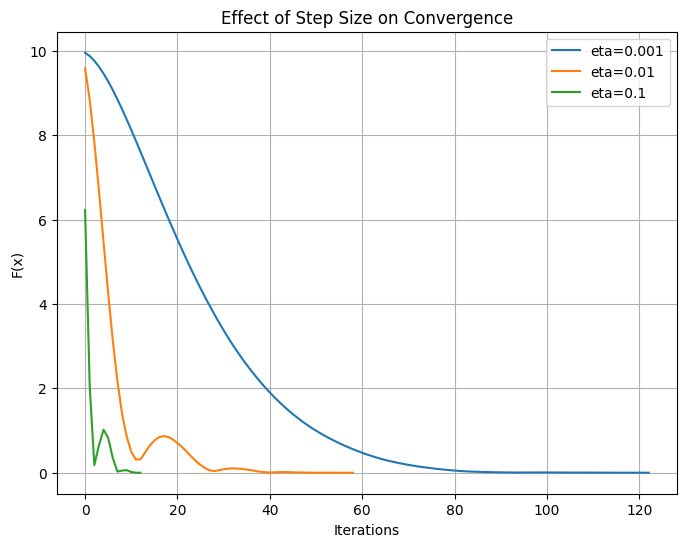

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the weakly smooth function f(x) and its gradient
def f(x):
    # Example: f(x) = 0.5 * x^2 + |x|^1.5 (weakly smooth)
    return 0.5 * np.sum(x**2) + np.sum(np.abs(x)**1.5)

def grad_f(x):
    # Gradient of f(x)
    return x + 1.5 * np.sign(x) * np.abs(x)**0.5

# def f(x):
#     # Example: f(x) = 0.5 * ||x||_2^2 + ||x||_{1.5} + c^T x
#     c = np.random.randn(n)  # Random linear term
#     return 0.5 * np.sum(x**2) + np.sum(np.abs(x)**1.5) + np.dot(c, x)

# def grad_f(x):
#     # Gradient of f(x)
#     c = np.random.randn(n)  # Ensure the same random vector is used
#     return x + 1.5 * np.sign(x) * np.abs(x)**0.5 + c

# Define the non-differentiable convex function g(x)
def g(x):
    # Example: g(x) = lambda * ||x||_1 (L1 regularization)
    lambda_reg = 0.1
    return lambda_reg * np.sum(np.abs(x))

# Proximal operator for g(x) (soft-thresholding for L1 norm)
def prox_g(y, eta):
    lambda_reg = 0.1
    return np.sign(y) * np.maximum(np.abs(y) - eta * lambda_reg, 0)

# Algorithm: Proximal Gradient Descent with Nesterov Momentum
def prox_nesterov_momentum(f, grad_f, g, prox_g, x0, eta, beta, max_iter=1000, tol=1e-6):
    x = x0.copy()
    y = x0.copy()
    x_prev = x0.copy()
    F_values = []
    xs = []  # Store iterates for gradient norm analysis

    for k in range(max_iter):
        # Momentum update
        z = x + beta * (x - x_prev)

        # Proximal gradient step
        grad_z = grad_f(z)
        x_new = prox_g(z - eta * grad_z, eta)

        # Compute objective value
        F_k = f(x_new) + g(x_new)
        F_values.append(F_k)
        xs.append(x_new)

        # Check for convergence
        if k > 0 and np.abs(F_values[-1] - F_values[-2]) < tol:
            break

        # Update variables
        x_prev = x
        x = x_new

    return x, F_values, xs

# Parameters
n = 10  # Dimension of x
x0 = np.random.randn(n)  # Initial guess
eta = 0.01  # Step size
beta = 0.9  # Momentum parameter
max_iter = 500  # Maximum iterations

# Run the algorithm
x_opt, F_values, xs = prox_nesterov_momentum(f, grad_f, g, prox_g, x0, eta, beta, max_iter)

# True optimal solution (if known)
# Replace this with the true solution if available
x_true = np.zeros(n)  # Assume the true solution is zero for simplicity
F_star = f(x_true) + g(x_true)

# Plotting
plt.figure(figsize=(18, 12))

# Plot 1: Objective Function Value vs Iterations
plt.subplot(2, 2, 1)
plt.plot(F_values, label="Objective Value", color="blue")
plt.xlabel("Iterations")
plt.ylabel("F(x)")
plt.title("Convergence of Objective Function")
plt.grid(True)
plt.legend()

# Plot 2: Logarithmic Scale for Convergence Analysis
plt.subplot(2, 2, 2)
plt.semilogy(F_values, label="Objective Value (Log Scale)", color="green")
plt.xlabel("Iterations")
plt.ylabel("log(F(x))")
plt.title("Convergence on Log Scale")
plt.grid(True)
plt.legend()

# Plot 3: Gradient Norm vs Iterations
grad_norms = [np.linalg.norm(grad_f(x)) for x in xs]
plt.subplot(2, 2, 3)
plt.plot(grad_norms, label="Gradient Norm", color="red")
plt.xlabel("Iterations")
plt.ylabel("||∇f(x)||")
plt.title("Gradient Norm Convergence")
plt.grid(True)
plt.legend()

# Plot 4: Suboptimality Gap vs Iterations
errors = [F_k - F_star for F_k in F_values]
plt.subplot(2, 2, 4)
plt.semilogy(errors, label="Suboptimality Gap", color="purple")
plt.xlabel("Iterations")
plt.ylabel("log(F(x) - F*)")
plt.title("Suboptimality Gap Convergence")
plt.grid(True)
plt.legend()

# Show all plots
plt.tight_layout()
plt.show()

# Print final results
print("Optimal x:", x_opt)
print("Final Objective Value:", F_values[-1])

# Parameter Sensitivity Analysis (Optional)
etas = [0.001, 0.01, 0.1]
plt.figure(figsize=(8, 6))
for eta in etas:
    _, F_values_eta, _ = prox_nesterov_momentum(f, grad_f, g, prox_g, x0, eta, beta, max_iter)
    plt.plot(F_values_eta, label=f"eta={eta}")
plt.xlabel("Iterations")
plt.ylabel("F(x)")
plt.title("Effect of Step Size on Convergence")
plt.grid(True)
plt.legend()
plt.show()

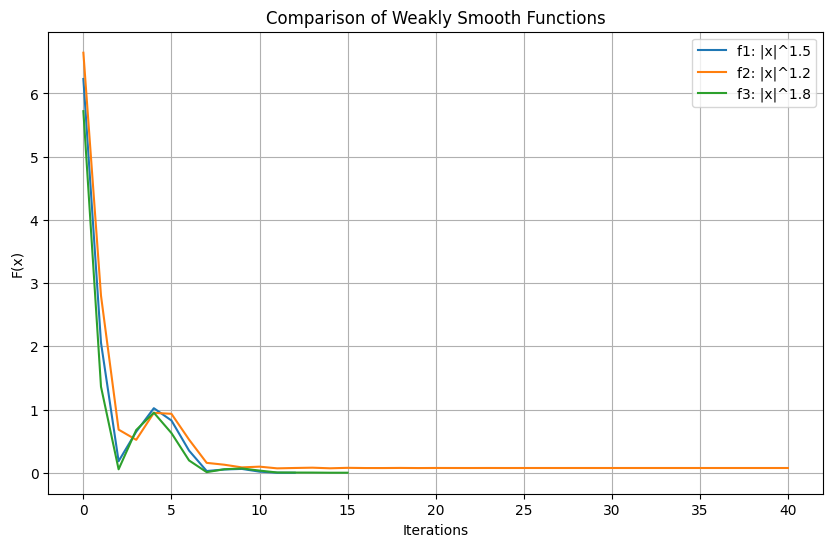

In [4]:
# Define different weakly smooth functions
def f1(x):
    return 0.5 * np.sum(x**2) + np.sum(np.abs(x)**1.5)

def grad_f1(x):
    return x + 1.5 * np.sign(x) * np.abs(x)**0.5

def f2(x):
    return 0.5 * np.sum(x**2) + np.sum(np.abs(x)**1.2)

def grad_f2(x):
    return x + 1.2 * np.sign(x) * np.abs(x)**0.2

def f3(x):
    return 0.5 * np.sum(x**2) + np.sum(np.abs(x)**1.8)

def grad_f3(x):
    return x + 1.8 * np.sign(x) * np.abs(x)**0.8

# Run the algorithm for all functions
functions = [(f1, grad_f1, "f1: |x|^1.5"),
             (f2, grad_f2, "f2: |x|^1.2"),
             (f3, grad_f3, "f3: |x|^1.8")]

plt.figure(figsize=(10, 6))
for f_func, grad_f_func, label in functions:
    _, F_values, _ = prox_nesterov_momentum(f_func, grad_f_func, g, prox_g, x0, eta, beta, max_iter)
    plt.plot(F_values, label=label)

plt.xlabel("Iterations")
plt.ylabel("F(x)")
plt.title("Comparison of Weakly Smooth Functions")
plt.grid(True)
plt.legend()
plt.show()

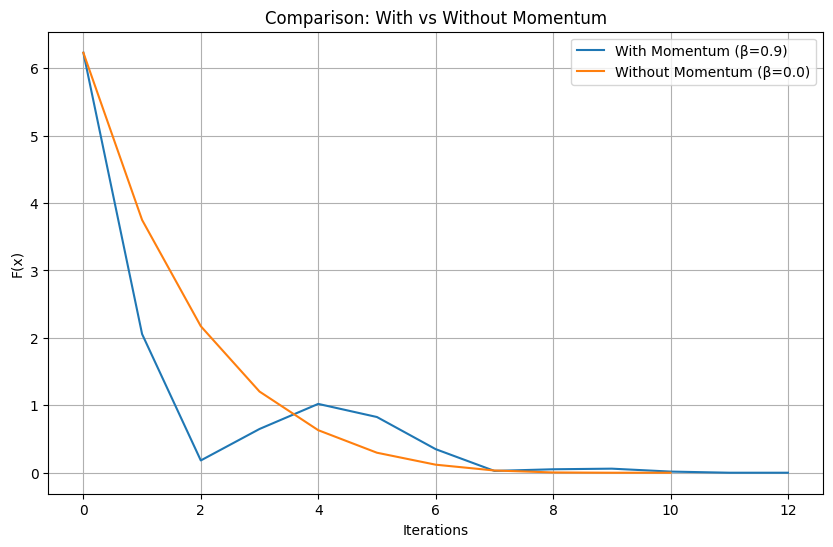

In [5]:
# Run the algorithm with and without momentum
momentum_cases = [(0.9, "With Momentum (β=0.9)"),
                  (0.0, "Without Momentum (β=0.0)")]

plt.figure(figsize=(10, 6))
for beta_val, label in momentum_cases:
    _, F_values, _ = prox_nesterov_momentum(f1, grad_f1, g, prox_g, x0, eta, beta_val, max_iter)
    plt.plot(F_values, label=label)

plt.xlabel("Iterations")
plt.ylabel("F(x)")
plt.title("Comparison: With vs Without Momentum")
plt.grid(True)
plt.legend()
plt.show()

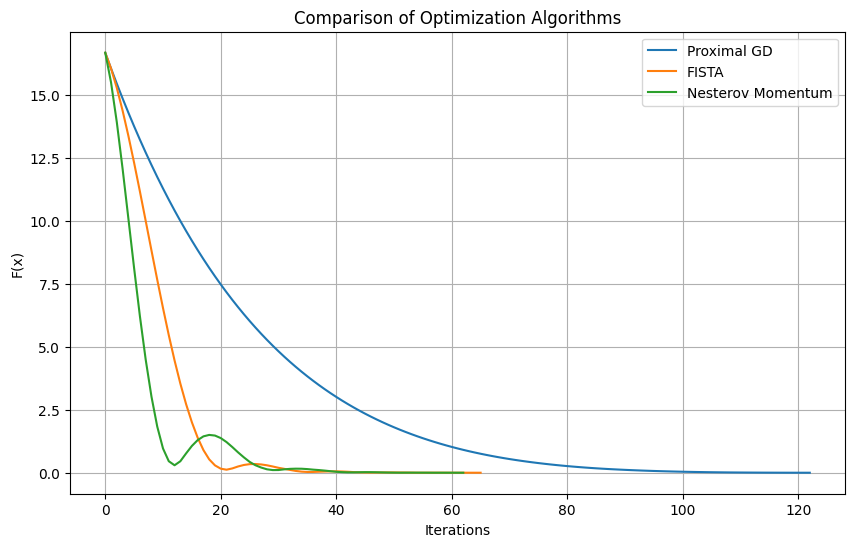

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the weakly smooth function f(x) and its gradient
def f(x):
    # Example: f(x) = 0.5 * x^2 + |x|^1.5 (weakly smooth)
    return 0.5 * np.sum(x**2) + np.sum(np.abs(x)**1.5)

def grad_f(x):
    # Gradient of f(x)
    return x + 1.5 * np.sign(x) * np.abs(x)**0.5

# Define the non-differentiable convex function g(x)
def g(x):
    # Example: g(x) = lambda * ||x||_1 (L1 regularization)
    lambda_reg = 0.1
    return lambda_reg * np.sum(np.abs(x))

# Proximal operator for g(x) (soft-thresholding for L1 norm)
def prox_g(y, eta):
    lambda_reg = 0.1
    return np.sign(y) * np.maximum(np.abs(y) - eta * lambda_reg, 0)

# Algorithm 1: Standard Proximal Gradient Descent
def prox_gradient_descent(f, grad_f, g, prox_g, x0, eta, max_iter=1000, tol=1e-6):
    x = x0.copy()
    F_values = []
    for k in range(max_iter):
        grad_x = grad_f(x)
        x_new = prox_g(x - eta * grad_x, eta)
        F_k = f(x_new) + g(x_new)
        F_values.append(F_k)
        if k > 0 and np.abs(F_values[-1] - F_values[-2]) < tol:
            break
        x = x_new
    return x, F_values

# Algorithm 2: FISTA (Fast Iterative Shrinkage-Thresholding Algorithm)
def fista(f, grad_f, g, prox_g, x0, eta, max_iter=1000, tol=1e-6):
    x = x0.copy()
    y = x0.copy()
    t = 1
    F_values = []
    for k in range(max_iter):
        grad_y = grad_f(y)
        x_new = prox_g(y - eta * grad_y, eta)
        t_new = (1 + np.sqrt(1 + 4 * t**2)) / 2
        y = x_new + ((t - 1) / t_new) * (x_new - x)
        F_k = f(x_new) + g(x_new)
        F_values.append(F_k)
        if k > 0 and np.abs(F_values[-1] - F_values[-2]) < tol:
            break
        x = x_new
        t = t_new
    return x, F_values

# Algorithm 3: Proximal Gradient Descent with Nesterov Momentum
def prox_nesterov_momentum(f, grad_f, g, prox_g, x0, eta, beta, max_iter=1000, tol=1e-6):
    x = x0.copy()
    y = x0.copy()
    x_prev = x0.copy()
    F_values = []
    for k in range(max_iter):
        # Momentum update
        z = x + beta * (x - x_prev)
        # Proximal gradient step
        grad_z = grad_f(z)
        x_new = prox_g(z - eta * grad_z, eta)
        # Compute objective value
        F_k = f(x_new) + g(x_new)
        F_values.append(F_k)
        # Check for convergence
        if k > 0 and np.abs(F_values[-1] - F_values[-2]) < tol:
            break
        # Update variables
        x_prev = x
        x = x_new
    return x, F_values

# Parameters
n = 10  # Dimension of x
x0 = np.random.randn(n)  # Initial guess
eta = 0.01  # Step size
beta = 0.9  # Momentum parameter
max_iter = 500  # Maximum iterations

# Run all algorithms
algorithms = [
    ("Proximal GD", lambda: prox_gradient_descent(f, grad_f, g, prox_g, x0, eta, max_iter)),
    ("FISTA", lambda: fista(f, grad_f, g, prox_g, x0, eta, max_iter)),
    ("Nesterov Momentum", lambda: prox_nesterov_momentum(f, grad_f, g, prox_g, x0, eta, beta, max_iter))
]

plt.figure(figsize=(10, 6))
for name, algo in algorithms:
    _, F_values = algo()  # Ensure each algorithm returns exactly two values
    plt.plot(F_values, label=name)

plt.xlabel("Iterations")
plt.ylabel("F(x)")
plt.title("Comparison of Optimization Algorithms")
plt.grid(True)
plt.legend()
plt.show()

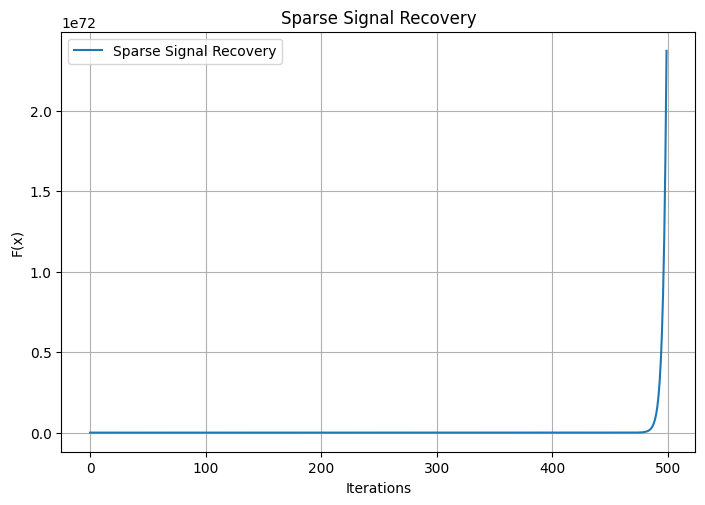

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import random
import tensorflow as tf

# Define the weakly smooth function f(x) and its gradient
def f(x):
    # Example: f(x) = 0.5 * x^2 + |x|^1.5 (weakly smooth)
    return 0.5 * np.sum(x**2) + np.sum(np.abs(x)**1.5)

def grad_f(x):
    # Gradient of f(x)
    return x + 1.5 * np.sign(x) * np.abs(x)**0.5

# Define the non-differentiable convex function g(x)
def g(x):
    # Example: g(x) = lambda * ||x||_1 (L1 regularization)
    lambda_reg = 0.1
    return lambda_reg * np.sum(np.abs(x))

# Proximal operator for g(x) (soft-thresholding for L1 norm)
def prox_g(y, eta):
    lambda_reg = 0.1
    return np.sign(y) * np.maximum(np.abs(y) - eta * lambda_reg, 0)

# Algorithm: Proximal Gradient Descent with Nesterov Momentum
def prox_nesterov_momentum(f, grad_f, g, prox_g, x0, eta, beta, max_iter=1000, tol=1e-6):
    x = x0.copy()
    y = x0.copy()
    x_prev = x0.copy()
    F_values = []
    for k in range(max_iter):
        # Momentum update
        z = x + beta * (x - x_prev)
        # Proximal gradient step
        grad_z = grad_f(z)
        x_new = prox_g(z - eta * grad_z, eta)
        # Compute objective value
        F_k = f(x_new) + g(x_new)
        F_values.append(F_k)
        # Check for convergence
        if k > 0 and np.abs(F_values[-1] - F_values[-2]) < tol:
            break
        # Update variables
        x_prev = x
        x = x_new
    return x, F_values

# Parameters
n = 500  # Dimension of x
x0 = np.zeros(n)  # Initial guess
eta = 0.01  # Step size
beta = 0.9  # Momentum parameter
max_iter = 500  # Maximum iterations

# Test Case 1: Sparse Signal Recovery
A = random(100, n, density=0.1).toarray()  # Random sensing matrix (100 x 500)
x_true = np.zeros(n)
x_true[:10] = np.random.randn(10)  # Sparse signal
b = A @ x_true + 0.1 * np.random.randn(100)  # Noisy measurements

def f_sparse(x):
    return 0.5 * np.linalg.norm(A @ x - b)**2

def grad_f_sparse(x):
    return A.T @ (A @ x - b)

def g_sparse(x):
    lambda_reg = 0.1
    return lambda_reg * np.sum(np.abs(x))

def prox_g_sparse(y, eta):
    lambda_reg = 0.1
    return np.sign(y) * np.maximum(np.abs(y) - eta * lambda_reg, 0)

_, F_values_sparse = prox_nesterov_momentum(f_sparse, grad_f_sparse, g_sparse, prox_g_sparse, x0, eta, beta, max_iter)

# # Test Case 2: Adam Optimization (Benchmark)
# optimizer = tf.keras.optimizers.Adam(learning_rate=eta)
# x_adam_tf = tf.Variable(x0, dtype=tf.float32)  # Use TensorFlow variable
# F_values_adam = []

# for _ in range(max_iter):
#     with tf.GradientTape() as tape:
#         loss = f(x_adam_tf.numpy()) + g(x_adam_tf.numpy())  # Objective function
#     grads = tape.gradient(loss, x_adam_tf)  # Compute gradients
#     optimizer.apply_gradients(zip([grads], [x_adam_tf]))  # Update variables
#     F_k = f(x_adam_tf.numpy()) + g(x_adam_tf.numpy())
#     F_values_adam.append(F_k)

# Test Case 2: Adam Optimization (Benchmark)
optimizer = tf.keras.optimizers.Adam(learning_rate=eta)
x_adam_tf = tf.Variable(x0, dtype=tf.float32)  # Use TensorFlow variable
F_values_adam = []
lambda_reg = 0.1  # Define lambda_reg within the loop's scope

for _ in range(max_iter):
    with tf.GradientTape() as tape:
        # Calculate loss within the GradientTape context using TensorFlow operations
        loss = 0.5 * tf.reduce_sum(x_adam_tf**2) + tf.reduce_sum(tf.abs(x_adam_tf)**1.5)  # f(x) in TensorFlow
        loss += lambda_reg * tf.reduce_sum(tf.abs(x_adam_tf))  # g(x) in TensorFlow

    grads = tape.gradient(loss, x_adam_tf)  # Compute gradients
    optimizer.apply_gradients(zip([grads], [x_adam_tf]))  # Update variables
    F_k = f(x_adam_tf.numpy()) + g(x_adam_tf.numpy())  # Can keep this for consistency
    F_values_adam.append(F_k)


# Test Case 3: Sensitivity Analysis (Step Size and Momentum)
etas = [0.001, 0.01, 0.1]
betas = [0.0, 0.5, 0.9]

plt.figure(figsize=(18, 12))

# Plot 1: Sparse Signal Recovery
plt.subplot(2, 2, 1)
plt.plot(F_values_sparse, label="Sparse Signal Recovery")
plt.xlabel("Iterations")
plt.ylabel("F(x)")
plt.title("Sparse Signal Recovery")
plt.grid(True)
plt.legend()


plt.show()